# **SPAM CLASSIFICATION SYSTEM**

### CONTENTS
###### *1) Install and Import Libraries*
###### *2) Data Pre-processing*
###### *3) Data Visualization*
###### *4) Text Pre-processing*
###### *5) Continuing Normalization and Vectorization*
###### *6) Training Model (Naive Bayes Classifier Algorithm)*
###### *7) Model Evaluation*
###### *8) Train Test Split*
###### *9) Creating a Data Pipeline*


In [1]:
# Upload "spam.csv" from local system
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


## 1) INSTALL AND IMPORT LIBRARIES

In [2]:
# Installing pandas, nltk, sklearn and matplotlib
!pip install pandas
!pip install nltk
!pip install sklearn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=dd760e8a9a88e0ad61e0e24b11707dd6e872ee5ebd7c10f54e0561514a7cdac2
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
%matplotlib inline

## 2) DATA PRE-PROCESSING

In [4]:
# Load data from CSV file
message = pd.read_csv('spam.csv', encoding='latin-1')

# Remove unnecessary columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
message.drop(columns_to_drop, axis=1, inplace=True)

# Rename columns
column_names = {'v1': 'labels', 'v2': 'message'}
message.rename(columns=column_names, inplace=True)

# Show the first few rows of the resulting DataFrame
message.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Returns all statistics
message.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# Groups by the values in "labels" column and returns statistics
message.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [7]:
# Creates new column "length" and returns with the length of each message
message['length']=message['message'].apply(len)
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## 3) DATA VISUALIZATION

<Axes: ylabel='Frequency'>

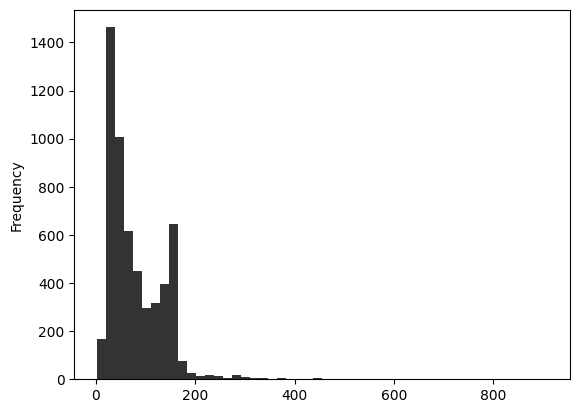

In [8]:
# Creates a histogram plot of the "length" column
message['length'].plot(bins=50, kind='hist', color='black', alpha=0.8)

In [9]:
# Returns overview of the distribution of message lengths
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [10]:
# Finds and prints the longest message and assigns it to "longest_message"
longest_message = message.loc[message['length'].idxmax(), 'message']
print(longest_message)

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


## 4) TEXT PRE-PROCESSING

In [11]:
# Removes all punctuation characters from the string
mess = 'sample message!...'
nopunc = ''.join(char for char in mess if char not in string.punctuation)

print(nopunc)

sample message


In [12]:
# Stopwords are common words in a language that are often filtered out during text analysis
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Returns first 10 stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
# Splits into individual words
nopunc.split()

['sample', 'message']

In [15]:
# Cleans the string by removing the stopwords from the text
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['sample', 'message']

In [16]:
# Preprocess text data by removing punctuation and English stopwords
def text_process(mess):
    nopunc = ''.join(char for char in mess if char not in string.punctuation)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [17]:
# First 5 rows of dataframe "message"
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


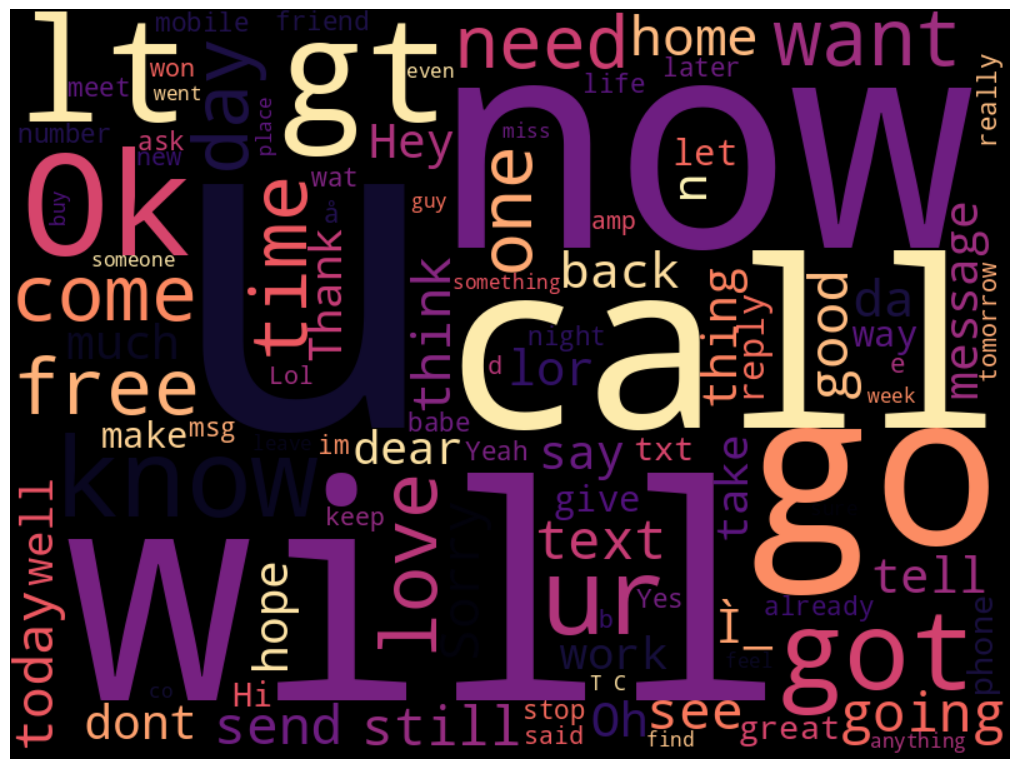

In [18]:
# Create a wordcloud which is visual representation of most frequently occuring words where size represents frequency
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join(message.message.values)

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='black',
    stopwords=STOPWORDS,
    max_words=100,
    colormap='magma',
    contour_width=3,
    contour_color='steelblue'
).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
# First 5 rows of dataframe "message"
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## 5) CONTINUING NORMALIZATION AND VECTORIZATION

In [20]:
# Bag of Words (BoW) representation of the text messages in the "message" DataFrame
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])
vocab_size = len(bow_transformer.vocabulary_)

print("Vocabulary size:", vocab_size)

Vocabulary size: 11304


In [21]:
# Selects the fourth message from the "message" DataFrame
message4 = message.loc[3, 'message']
print(message4)

U dun say so early hor... U c already then say...


In [22]:
# Bag of Words (BoW) representation of the fourth message in the "message" DataFrame
# Transform() returns a sparse matrix
# Here, there are 7 unique words in message number 4 where two of them appear twice
bow4 = bow_transformer.transform([message4])
print(bow4)
print('Shape: {}'.format(bow4.shape))

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
Shape: (1, 11304)


In [23]:
# Prints the words corresponding to two specific indices (4073 and 9570) in BoW
print(bow_transformer.get_feature_names_out()[4073])
print(bow_transformer.get_feature_names_out()[9570])

VALUED
shades


In [24]:
# Creates a sparse matrix representation of the entire corpus of text messages and prints shape of matrix and non zero occurences
messages_bow = bow_transformer.transform(message['message'])
print('Shape of Sparse Matrix: {}'.format(messages_bow.shape))
print('Number of Non-Zero Occurrences: {}'.format(messages_bow.count_nonzero()))

Shape of Sparse Matrix: (5572, 11304)
Number of Non-Zero Occurrences: 50193


In [25]:
# Calculate sparsity of the bag-of-words matrix "messages_bow" which is % of non zero elements in the matrix
sparsity =(100.0 * messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [26]:
# Calculates TF-IDF (Term Frequency-Inverse Document Frequency) representation of a single message
tfidf_transformer=TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [27]:
# The IDF (Inverse Document Frequency) of the word "u" and word "university"
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.288863056423095
8.527076498901426


In [28]:
# Calculates the TF-IDF (term frequency-inverse document frequency) values for the entire dataset of messages
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11304)


## 6) TRAINING MODEL (NAIVE BAYES CLASSIFIER ALGORITHM)

In [29]:
# Use Naive Bayes classifier to predict whether a given message is spam or ham
# the prediction is then compared to the actual label to evaluate the model's accuracy
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['labels'])
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',message.labels[3])

predicted: ham
expected: ham


## 7) MODEL EVALUATION

In [30]:
# Predicts whether each message in the dataset is spam or ham
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [31]:
# Evaluate the performance of the spam detection model using classification report and confusion matrix
print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 114  633]]


## 8) TRAIN TEST SPLIT

In [32]:
# Split the "message" dataset into two parts, one for training the model and another for testing the model 
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['labels'],test_size=0.2)
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


## 9) CREATING A DATA PIPELINE



In [33]:
# Creates a ML pipeline that preprocesses the text data and then trains Naive Bayes classifier on the preprocessed data
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fdc09770670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [34]:
# Prints classification report
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1005
        spam       0.73      1.00      0.85       110

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115

